# EDA FINANCIAL PROJECT- FABRICATED FRAUD DETECTION

In [ ]:
import pandas as pd
import seaborn as ss
import csv
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
import os
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, mutual_info_classif


## Data collection and Understanding

   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What are your savings objectives?  \
0        M

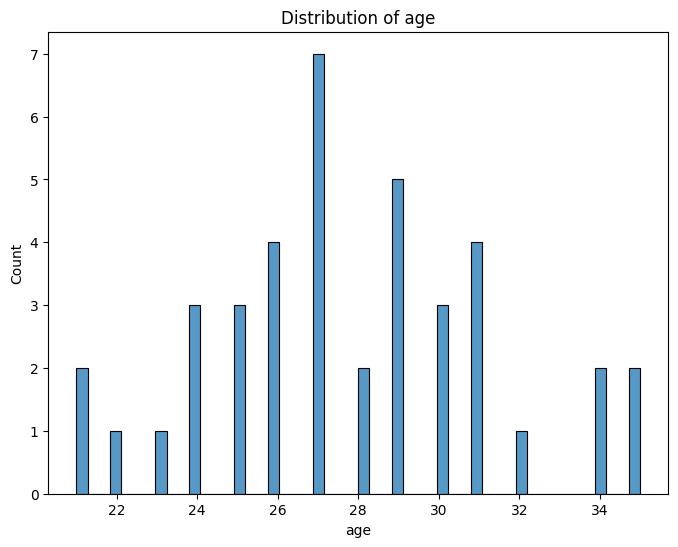

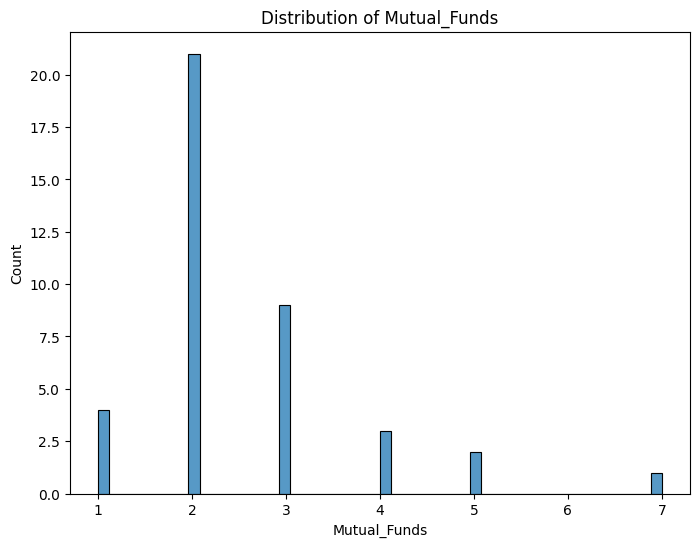

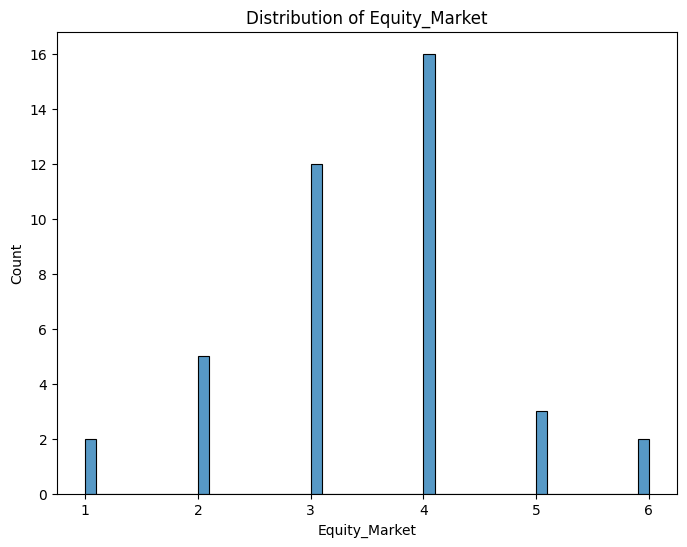

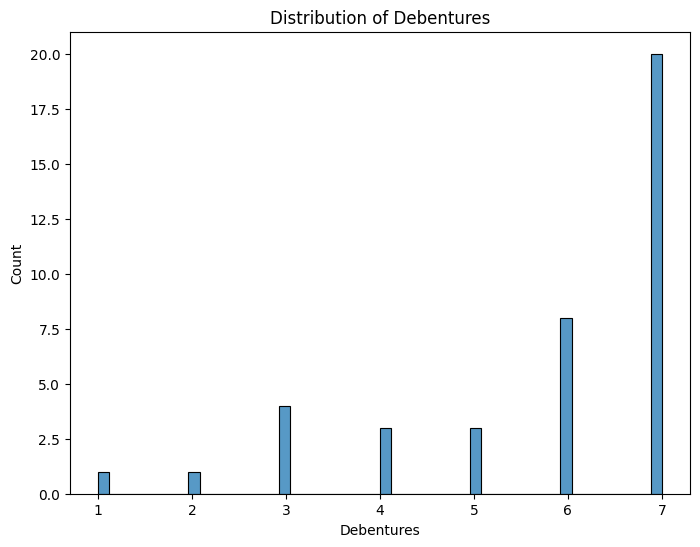

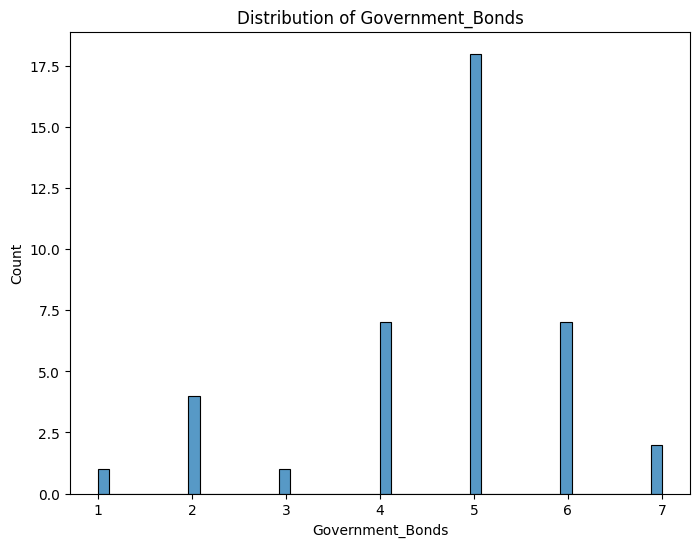

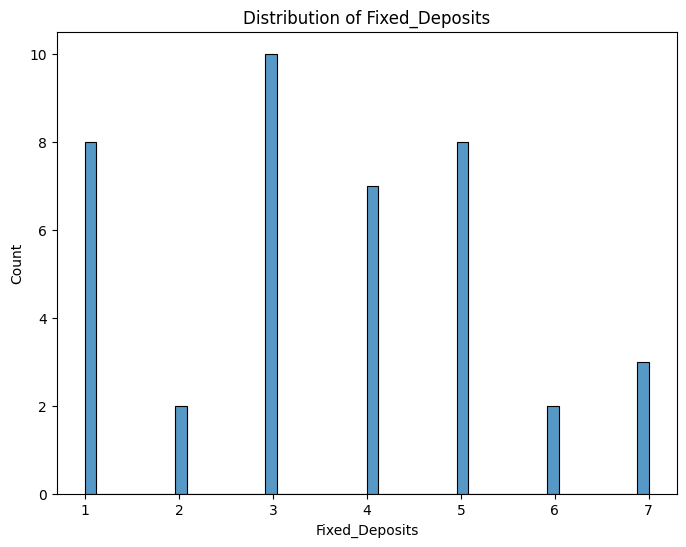

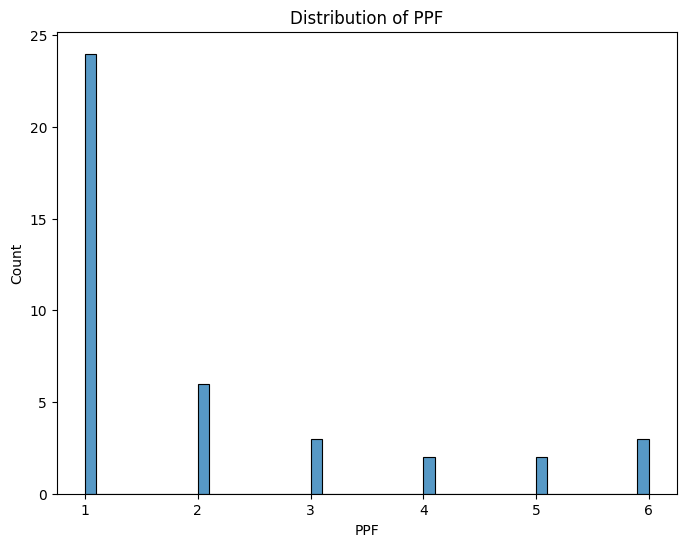

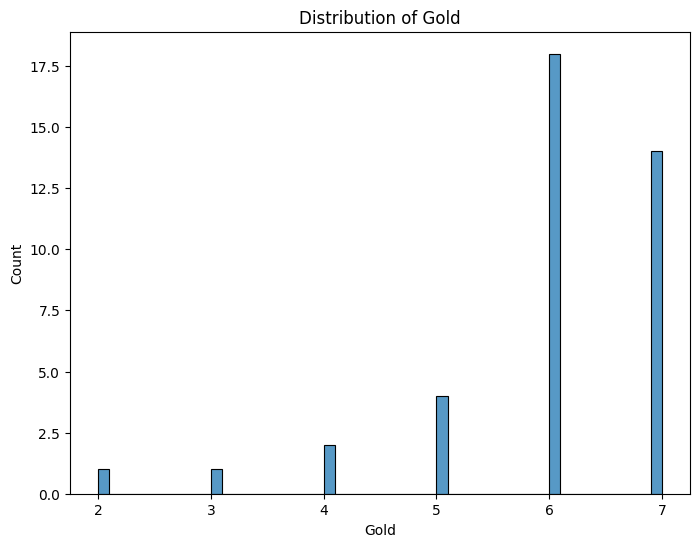

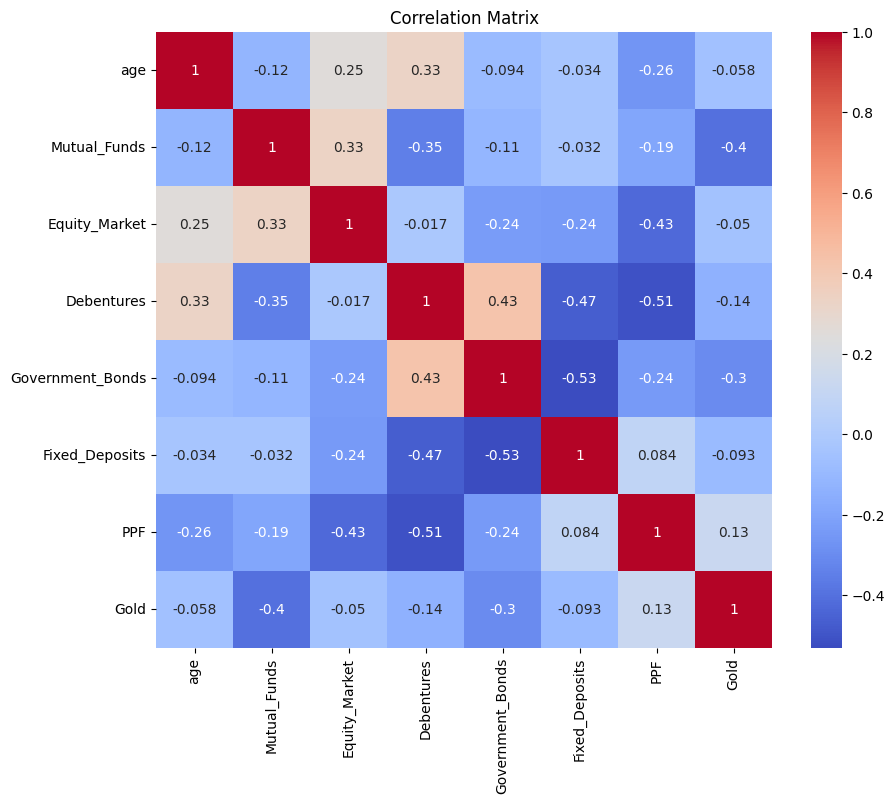

In [4]:

# Read the Finance.csv file
df = pd.read_csv('Finance_data.csv')

# Print the first few rows of the dataframe
print(df.head())

# Get an overview of the dataframe
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualize the correlation between numerical columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# **Categorical Variable Analysis**
# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print the unique values and counts for each categorical column
for col in categorical_cols:
    print(f'Unique values and counts for {col}:')
    print(df[col].value_counts())
    print()

# **Outlier Detection**
# Use the IQR method to detect outliers in numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in {col}:')
    print(outliers)
    print()


Unique values and counts for gender:
gender
Male      25
Female    15
Name: count, dtype: int64

Unique values and counts for Investment_Avenues:
Investment_Avenues
Yes    37
No      3
Name: count, dtype: int64

Unique values and counts for Stock_Marktet:
Stock_Marktet
Yes    35
No      5
Name: count, dtype: int64

Unique values and counts for Factor:
Factor
Returns           25
Risk              14
Locking Period     1
Name: count, dtype: int64

Unique values and counts for Objective:
Objective
Capital Appreciation    26
Growth                  11
Income                   3
Name: count, dtype: int64

Unique values and counts for Purpose:
Purpose
Wealth Creation       32
Savings for Future     6
Returns                2
Name: count, dtype: int64

Unique values and counts for Duration:
Duration
3-5 years            19
1-3 years            18
Less than 1 year      2
More than 5 years     1
Name: count, dtype: int64

Unique values and counts for Invest_Monitor:
Invest_Monitor
Monthly    2

## Data Cleaning and Transformation

Correlation Matrix:
                       age  Mutual_Funds  Equity_Market  Debentures  \
age               1.000000     -0.123914       0.246840    0.326638   
Mutual_Funds     -0.123914      1.000000       0.332043   -0.351495   
Equity_Market     0.246840      0.332043       1.000000   -0.016898   
Debentures        0.326638     -0.351495      -0.016898    1.000000   
Government_Bonds -0.093632     -0.114198      -0.237420    0.430323   
Fixed_Deposits   -0.033685     -0.031604      -0.238705   -0.470791   
PPF              -0.263167     -0.193665      -0.429003   -0.511169   
Gold             -0.057952     -0.401830      -0.050027   -0.137195   

                  Government_Bonds  Fixed_Deposits       PPF      Gold  
age                      -0.093632       -0.033685 -0.263167 -0.057952  
Mutual_Funds             -0.114198       -0.031604 -0.193665 -0.401830  
Equity_Market            -0.237420       -0.238705 -0.429003 -0.050027  
Debentures                0.430323       -0.4707

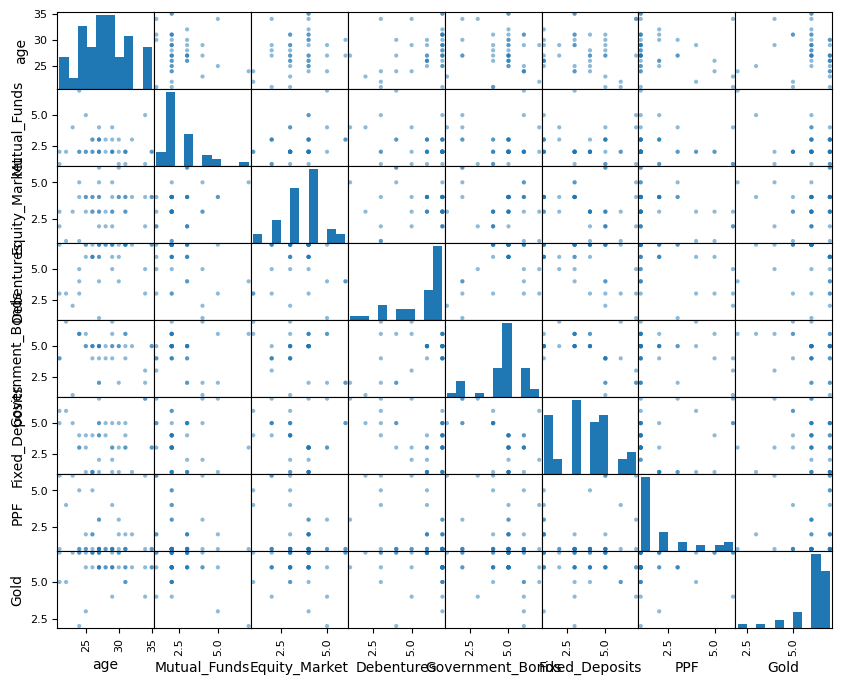

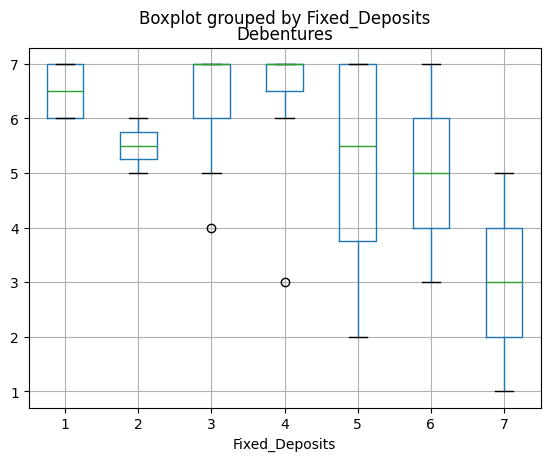

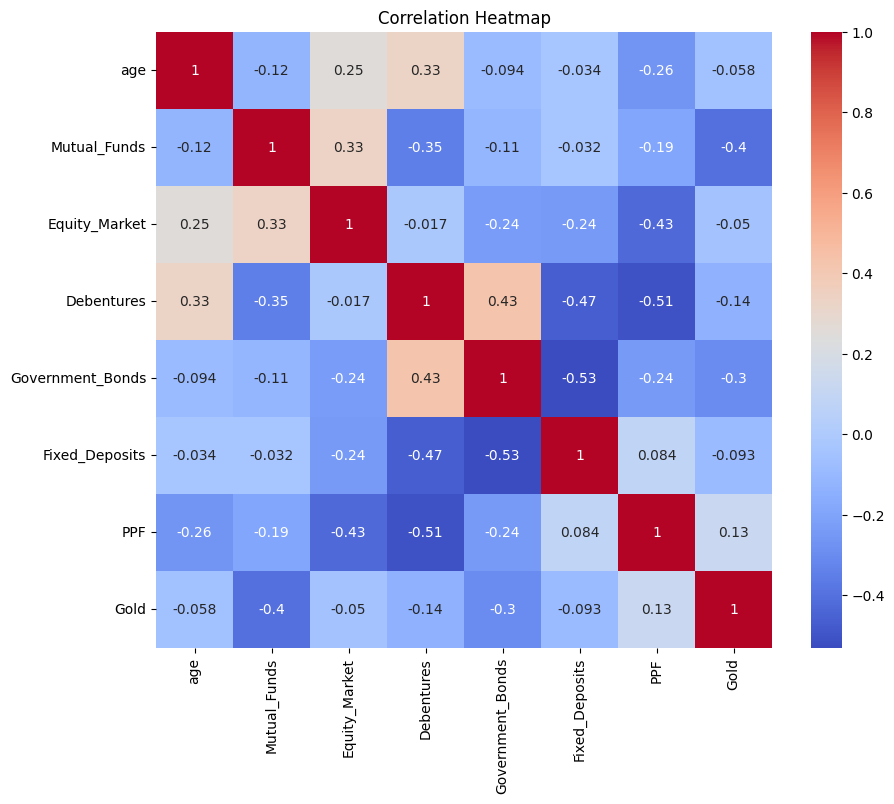

Cluster Labels:
[0 2 4 2 2 3 4 2 1 1 1 1 2 3 3 3 3 3 1 3 1 3 3 3 3 1 3 1 1 0 4 1 3 3 3 1 1
 3 1 1]
Reduced Data:
[[ 4.93711389  5.56579076]
 [-6.20289589  4.83764546]
 [ 2.0384557   3.13815462]
 [-6.76915794  1.30931654]
 [-4.94797881  1.33048704]
 [-3.77643728 -1.22026895]
 [-0.83455984  2.53249037]
 [-6.20953719 -0.59489202]
 [ 7.42025952 -0.05828678]
 [ 3.27803558  1.11647228]
 [ 7.42025952 -0.05828678]
 [ 1.80238524 -1.86701112]
 [-7.89220366  2.47233928]
 [ 0.52557709  0.25418053]
 [-2.30022785 -1.42367467]
 [-0.38488416 -1.0198985 ]
 [ 0.43979912 -0.74765356]
 [-0.56508332  0.12264931]
 [ 1.35026037  0.52642548]
 [-1.52688618 -2.20120989]
 [ 1.67422845 -1.26961527]
 [-3.55653707 -1.61967406]
 [-0.45943765 -1.67281323]
 [-2.38556169 -1.49345332]
 [-1.34255601 -1.22178659]
 [ 4.44824765 -1.57359568]
 [-1.52688618 -2.20120989]
 [ 3.46160246 -0.72039311]
 [ 0.97202671 -1.01193379]
 [ 5.31124047  5.79842299]
 [-2.0000555   5.95754901]
 [ 3.60537137 -1.37388605]
 [-0.46066862 -2.326408

In [6]:

# **Correlation Analysis**
# Calculate the correlation between all pairs of numerical columns
corr_matrix = df[numerical_cols].corr()
print('Correlation Matrix:')
print(corr_matrix)

# **Scatter Plot Matrix**
# Create a scatter plot matrix to visualize the relationships between numerical columns
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical_cols], figsize=(10, 8))
plt.show()

# **Box Plot**
# Create a box plot to compare the distribution of a numerical column across different categories
# Replace 'column_name' with the actual column name
column_name = 'Debentures'
boxplot = df.boxplot(column='Debentures', by='Fixed_Deposits')
plt.show()

# **Heatmap**
# Create a heatmap to visualize the correlation between numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# **Cluster Analysis**
# Perform k-means clustering on the numerical columns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[numerical_cols])
labels = kmeans.labels_
print('Cluster Labels:')
print(labels)

# **Dimensionality Reduction**
# Perform PCA on the numerical columns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df[numerical_cols])
reduced_data = pca.transform(df[numerical_cols])
print('Reduced Data:')
print(reduced_data)

## Data Exploration and Analysis

In [7]:
# Define the categorical and numerical columns
df = pd.read_csv('Finance_data.csv')
col=df.columns
"Invest_Monitor" in col


True

In [9]:

categorical_cols = ['gender', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect', 'Avenue', 'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source']
numerical_cols = ['age']

# Create a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)])

if "Invest_Monitor" in df.columns:
    df.drop("Invest_Monitor", axis=1, inplace=True)
    if "Invest_Monitor" in df.columns:
        y = df['Invest_Monitor']
        df.drop("Invest_Monitor", axis=1, inplace=True)
    
    # Fit the preprocessor to the data and transform it
    X = preprocessor.fit_transform(df)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
# Fit the preprocessor to the data and transform it
# X = preprocessor.fit_transform(df.drop('Invest_Monitor', axis=1))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, df['Invest_Monitor'], test_size=0.2, random_state=42)



<Axes: xlabel='Gold', ylabel='Count'>

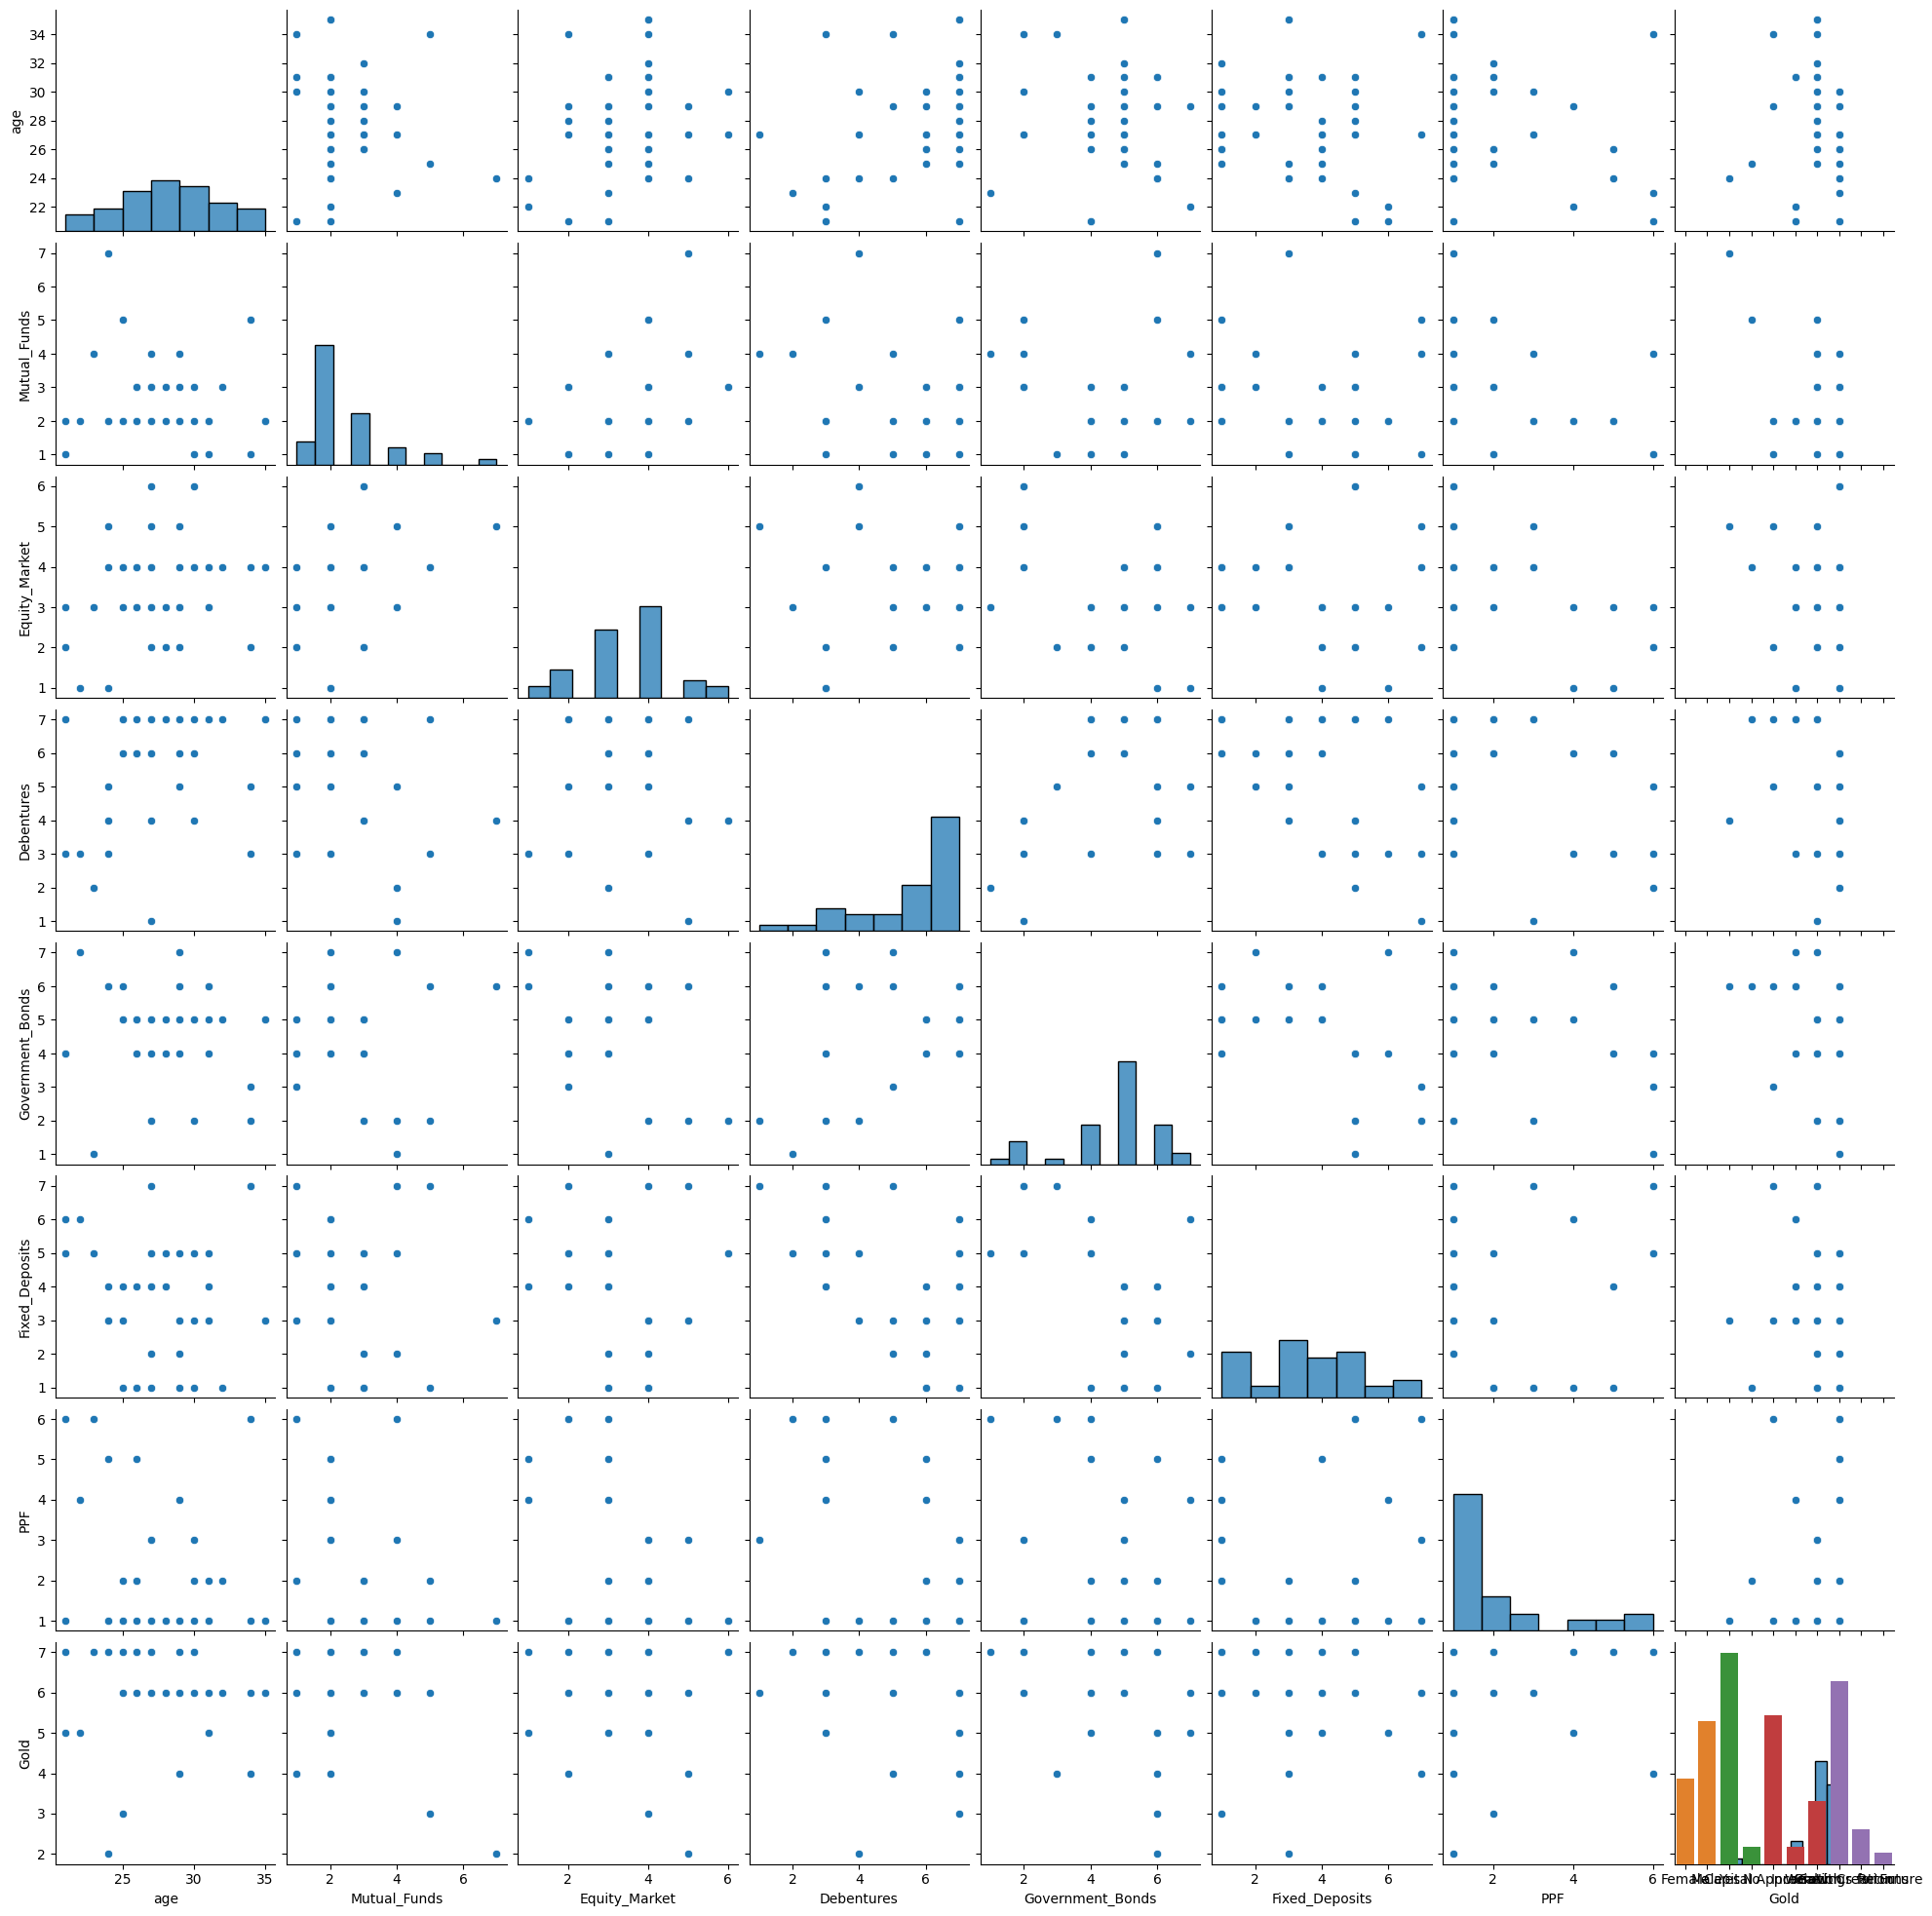

In [12]:
ss.pairplot(df)
sns.countplot(x='gender', data=df)
sns.countplot(x='Investment_Avenues', data=df)
sns.countplot(x='Objective', data=df)
sns.countplot(x='Purpose', data=df)

<Axes: >

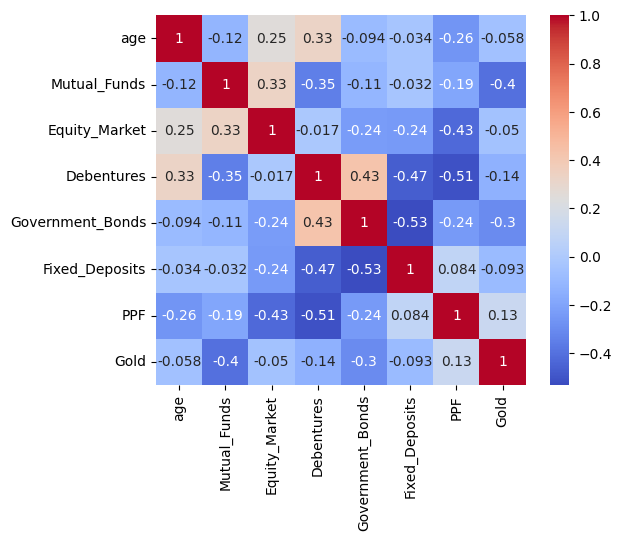

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

In [29]:
fig = px.scatter(df, x='age', y='Investment_Avenues', color='gender')
fig.show()

fig = px.bar(df, x='Objective', y='Debentures', color='Purpose')
fig.show()

## Descriptive Statistics

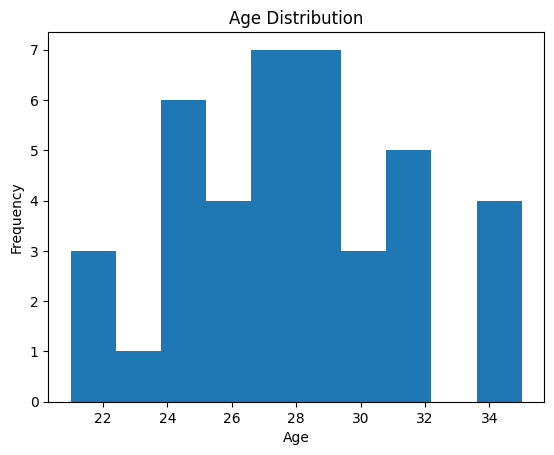

In [31]:
plt.hist(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Mean and standard deviation of Investment_Avenues by gender:
# print(df.groupby('gender')['Investment_Avenues'].mean())
# print(df.groupby('gender')['Investment_Avenues'].std())
# Proportion of Objective by Purpose:
print(df.groupby('Purpose')['Objective'].value_counts(normalize=True))

Purpose             Objective           
Returns             Capital Appreciation    0.500000
                    Income                  0.500000
Savings for Future  Growth                  0.833333
                    Capital Appreciation    0.166667
Wealth Creation     Capital Appreciation    0.750000
                    Growth                  0.187500
                    Income                  0.062500
Name: proportion, dtype: float64


In [35]:
print(df['gender'].value_counts())
print(df['Purpose'].value_counts())

gender
Male      25
Female    15
Name: count, dtype: int64
Purpose
Wealth Creation       32
Savings for Future     6
Returns                2
Name: count, dtype: int64


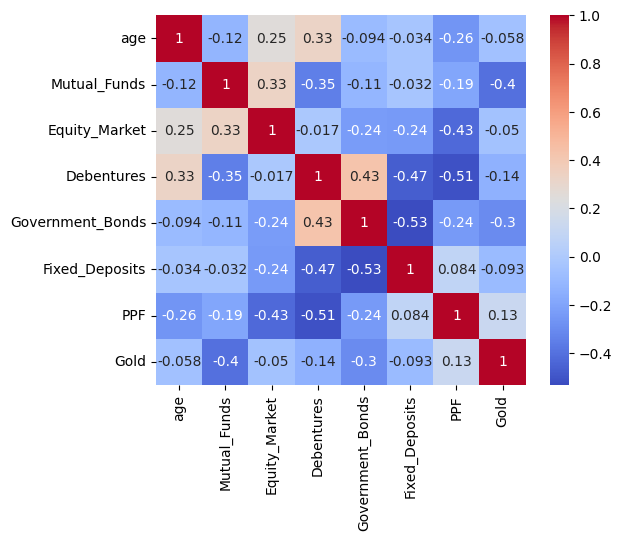

In [38]:

corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
ss.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()